IMPORTING THE RELEVANT LIBRARIES

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

READING AND DESCRIBING THE DATASET

In [40]:
df=pd.read_csv(r"E:\code\ML\Lab\Linear regression-CO2 Prediction\kNN\KNN_Data_Set_v2.0.csv")
print(df.columns)
print("\nDESCRIBING THE DATASET")
print(df.describe())
print("\nINFO ON THE DATASET")
df.info()

Index(['Name', 'Aptitude', 'Communication', 'Class'], dtype='object')

DESCRIBING THE DATASET
        Aptitude  Communication
count  16.000000      16.000000
mean    5.562500       4.937500
std     2.064582       1.631717
min     2.000000       2.000000
25%     4.750000       3.750000
50%     6.000000       5.250000
75%     7.000000       6.000000
max     9.000000       7.000000

INFO ON THE DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           16 non-null     object 
 1   Aptitude       16 non-null     int64  
 2   Communication  16 non-null     float64
 3   Class          16 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 640.0+ bytes


VISUALIZING THE DATA

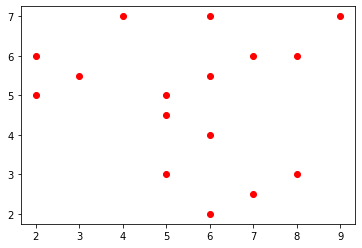

In [14]:
plt.scatter(df['Aptitude'],df['Communication'],color='red')

IMPORTING THE SKLEARN PACKAGE FOR SPLITTING DATA AND FOR MODEL SELECTION

In [33]:
from sklearn.model_selection import train_test_split
predictors = df.iloc[:,1:3]
target=df.iloc[:,3]
train_x,test_x,train_y,test_y=train_test_split(predictors,target,test_size=0.3,random_state=1)
print(train_x)
print(train_y)

    Aptitude  Communication
10         6            4.0
4          8            6.0
1          2            6.0
14         5            4.5
0          2            5.0
15         5            5.0
9          6            5.5
8          8            3.0
12         6            2.0
11         6            7.0
5          4            7.0
10      Intel
4      Leader
1     Speaker
14      Intel
0     Speaker
15    Speaker
9      Leader
8       Intel
12      Intel
11     Leader
5     Speaker
Name: Class, dtype: object


FITTING THE MODEL

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(train_x,train_y)
print("Test data/predictors:\n{}".format(test_x))
print("Test data/target values:\n{}".format(test_y))
print("Test predictions:\n {}".format(knn_classifier.predict(test_x)))


Test data/predictors:
    Aptitude  Communication
3          7            2.5
13         9            7.0
7          3            5.5
2          7            6.0
6          5            3.0
Test data/target values:
3       Intel
13     Leader
7     Speaker
2      Leader
6       Intel
Name: Class, dtype: object
Test predictions:
 ['Intel' 'Leader' 'Speaker' 'Leader' 'Intel']


EVALUATING THE MODEL

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
score=knn_classifier.score(test_x,test_y)
print("Accuracy: %lf"%score)
c_matrix=confusion_matrix(test_y,knn_classifier.predict(test_x))
print("Confusion matrix: \n{}".format(c_matrix))

Accuracy: 1.000000
Confusion matrix: 
[[2 0 0]
 [0 2 0]
 [0 0 1]]
